Silhouette Score за KMeans: 0.38027991606104805
DBSCAN намери само един клъстер или само 'шум'.


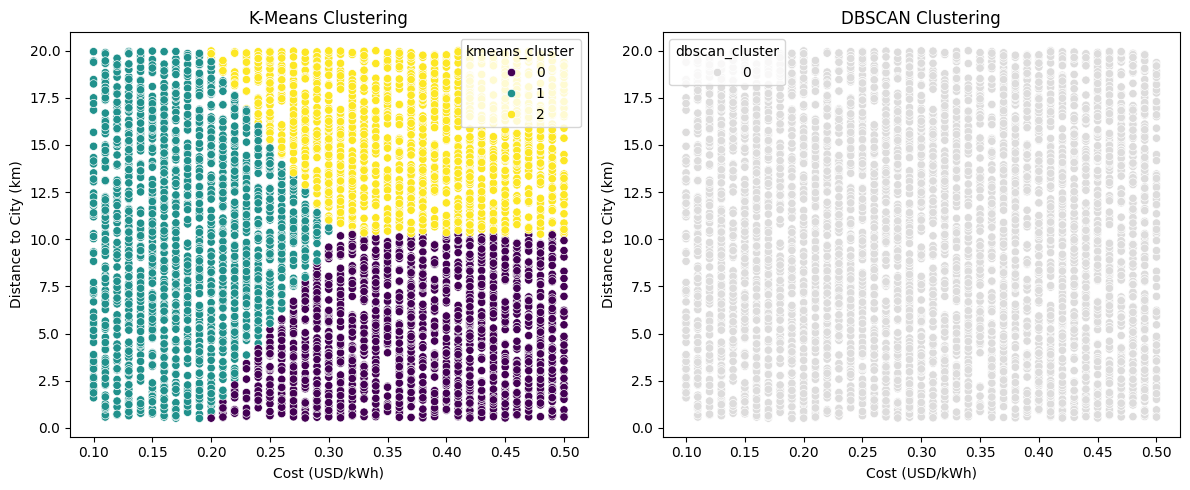

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score

# Зареждане на данните
df = pd.read_csv('detailed_ev_charging_stations.csv')

# Коригиране на имената на колоните
df.columns = df.columns.str.lower()

# Избиране на релевантните колони
df_cleaned = df[['cost (usd/kwh)', 'distance to city (km)']].copy()

# Премахване на липсващи стойности
df_cleaned.dropna(inplace=True)

# Нормализация на данните
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_cleaned)

# K-Means клъстеризация
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df_cleaned['kmeans_cluster'] = kmeans.fit_predict(df_scaled)

# DBSCAN клъстеризация
dbscan = DBSCAN(eps=2, min_samples=2)  # Може да увеличим eps
df_cleaned['dbscan_cluster'] = dbscan.fit_predict(df_scaled)

# Изчисляване на silhouette score
kmeans_silhouette = silhouette_score(df_scaled, df_cleaned['kmeans_cluster'])
print(f'Silhouette Score за KMeans: {kmeans_silhouette}')

# Проверка дали DBSCAN има повече от един клъстер
if len(set(df_cleaned['dbscan_cluster'])) > 1:
    dbscan_silhouette = silhouette_score(df_scaled, df_cleaned['dbscan_cluster'])
    print(f'Silhouette Score за DBSCAN: {dbscan_silhouette}')
else:
    print("DBSCAN намери само един клъстер или само 'шум'.")

# Визуализация на клъстерите
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.scatterplot(x=df_cleaned['cost (usd/kwh)'], y=df_cleaned['distance to city (km)'], hue=df_cleaned['kmeans_cluster'], palette='viridis')
plt.title('K-Means Clustering')
plt.xlabel('Cost (USD/kWh)')
plt.ylabel('Distance to City (km)')

plt.subplot(1, 2, 2)
sns.scatterplot(x=df_cleaned['cost (usd/kwh)'], y=df_cleaned['distance to city (km)'], hue=df_cleaned['dbscan_cluster'], palette='coolwarm')
plt.title('DBSCAN Clustering')
plt.xlabel('Cost (USD/kWh)')
plt.ylabel('Distance to City (km)')

plt.tight_layout()
plt.show()